In [47]:
# Third-party
import astropy.table as at
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('apw-notebook')
%matplotlib inline
from scipy.stats import norm

In [3]:
tgas = fits.getdata("../data/stacked_tgas.fits", 1)

In [4]:
apogee = fits.getdata("/Users/adrian/projects/thejoker/data/allStar-l30e.2.fits", 1)
apogee = apogee[(apogee['ra'] > 0) & (apogee['dec'] > -90)]

In [5]:
c_apogee = coord.SkyCoord(ra=apogee['ra']*u.degree, dec=apogee['dec']*u.degree)

In [6]:
tgas_rave = fits.getdata("../data/tgas-rave.fits", 1)

In [7]:
print(tgas_rave.dtype.names)

('hip', 'tycho2_id', 'solution_id', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_good_obs_ac', 'astrometric_n_bad_obs_al', 'astrometric_n_bad_obs_ac', 'astrometric_delta_q', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_primary_flag', 'astrometric_relegation_factor', 'astrometric_weight_al', 'astrometric_weight_ac', 'astrometric_priors_used', 'matched_observations', 'duplicated_source', 'scan_direction_strength_k1', 'scan_direction_strength_k2', 'scan_direction_strength_k3', 'scan_direction_strength_k4', 'scan_direction_mean_k1', 'scan_direction_mean_k2', 'scan_direction_mean

In [8]:
pair_idx = fits.getdata("../data/pairindices_cp01.fits", 1)

In [9]:
star1 = tgas[pair_idx['star1']]
star2 = tgas[pair_idx['star2']]

In [10]:
pairs_in_rave = (np.in1d(star1['source_id'], tgas_rave['source_id']) & 
                 np.in1d(star2['source_id'], tgas_rave['source_id']))

star1_in_rave = star1[pairs_in_rave]
star2_in_rave = star2[pairs_in_rave]

pair_idx_rave = pair_idx[pairs_in_rave]

In [11]:
pairs_in_rave.sum()

3575

In [12]:
c_rave = coord.SkyCoord(ra=tgas_rave['ra']*u.degree, dec=tgas_rave['dec']*u.degree)
c1 = coord.SkyCoord(ra=star1_in_rave['ra']*u.degree, dec=star1_in_rave['dec']*u.degree)
c2 = coord.SkyCoord(ra=star2_in_rave['ra']*u.degree, dec=star2_in_rave['dec']*u.degree)

In [13]:
idx1,sep,_ = c1.match_to_catalog_sky(c_rave)
idx2,sep,_ = c2.match_to_catalog_sky(c_rave)

In [14]:
rave1 = tgas_rave[idx1]
rave2 = tgas_rave[idx2]
print(len(rave1), len(rave2))

rave_sky_sep = (coord.SkyCoord(ra=rave1['ra']*u.degree, dec=rave1['dec']*u.degree)
                .separation(coord.SkyCoord(ra=rave2['ra']*u.degree, dec=rave2['dec']*u.degree)))

3575 3575


In [15]:
_i1,sep1,_ = c1.match_to_catalog_sky(c_apogee)
_i2,sep2,_ = c2.match_to_catalog_sky(c_apogee)

_i1 = _i1[(sep1 < 1*u.arcsecond) & (sep2 < 1*u.arcsecond)]
_i2 = _i2[(sep1 < 1*u.arcsecond) & (sep2 < 1*u.arcsecond)]

apogee1 = apogee[_i1]
apogee2 = apogee[_i2]
len(apogee1)

9

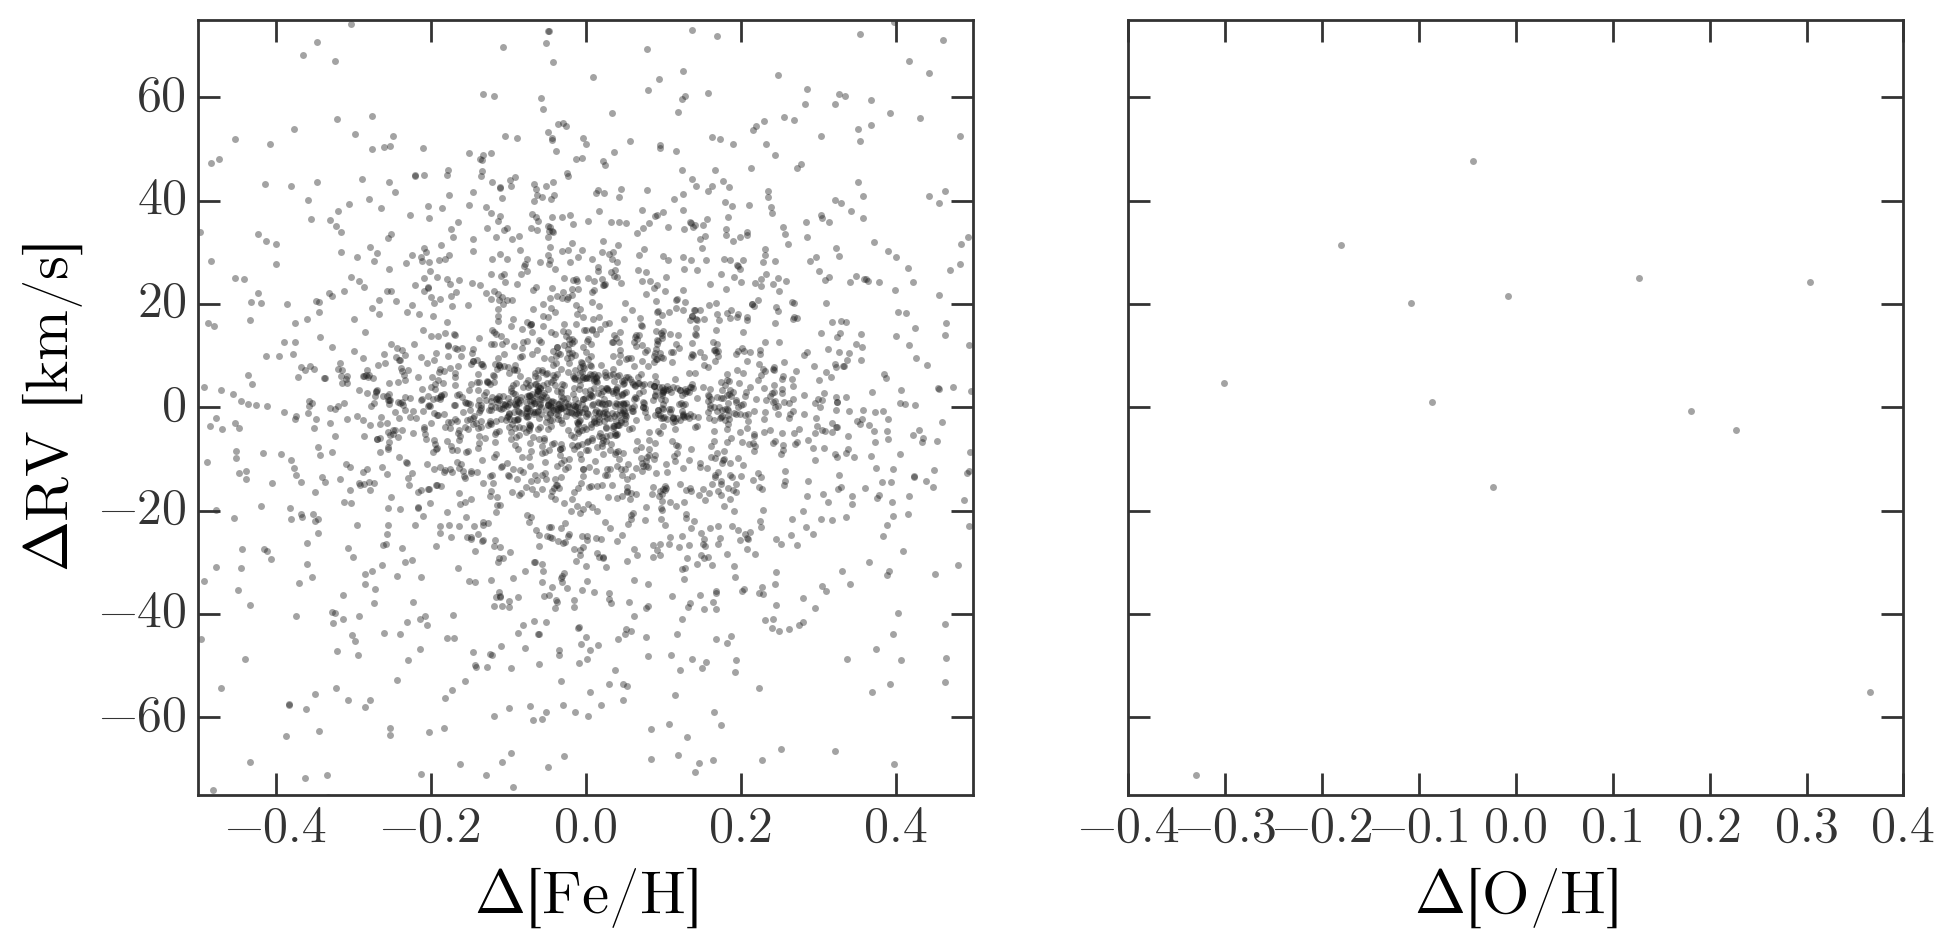

In [118]:
fig,axes = plt.subplots(1,2,figsize=(11,5),sharey=True)

axes[0].plot(rave1['FE_H'] - rave2['FE_H'], rave1['HRV'] - rave2['HRV'],
             ls='none', marker='.', alpha=0.4)

axes[1].plot(rave1['MG_H'] - rave2['MG_H'], rave1['HRV'] - rave2['HRV'],
             ls='none', marker='.', alpha=0.4)

axes[0].set_xlim(-0.5, 0.5)
axes[0].set_ylim(-75, 75)

axes[0].set_ylabel(r'$\Delta$RV [km/s]')
axes[0].set_xlabel(r'$\Delta$[Fe/H]')
axes[1].set_xlabel(r'$\Delta$[O/H]')

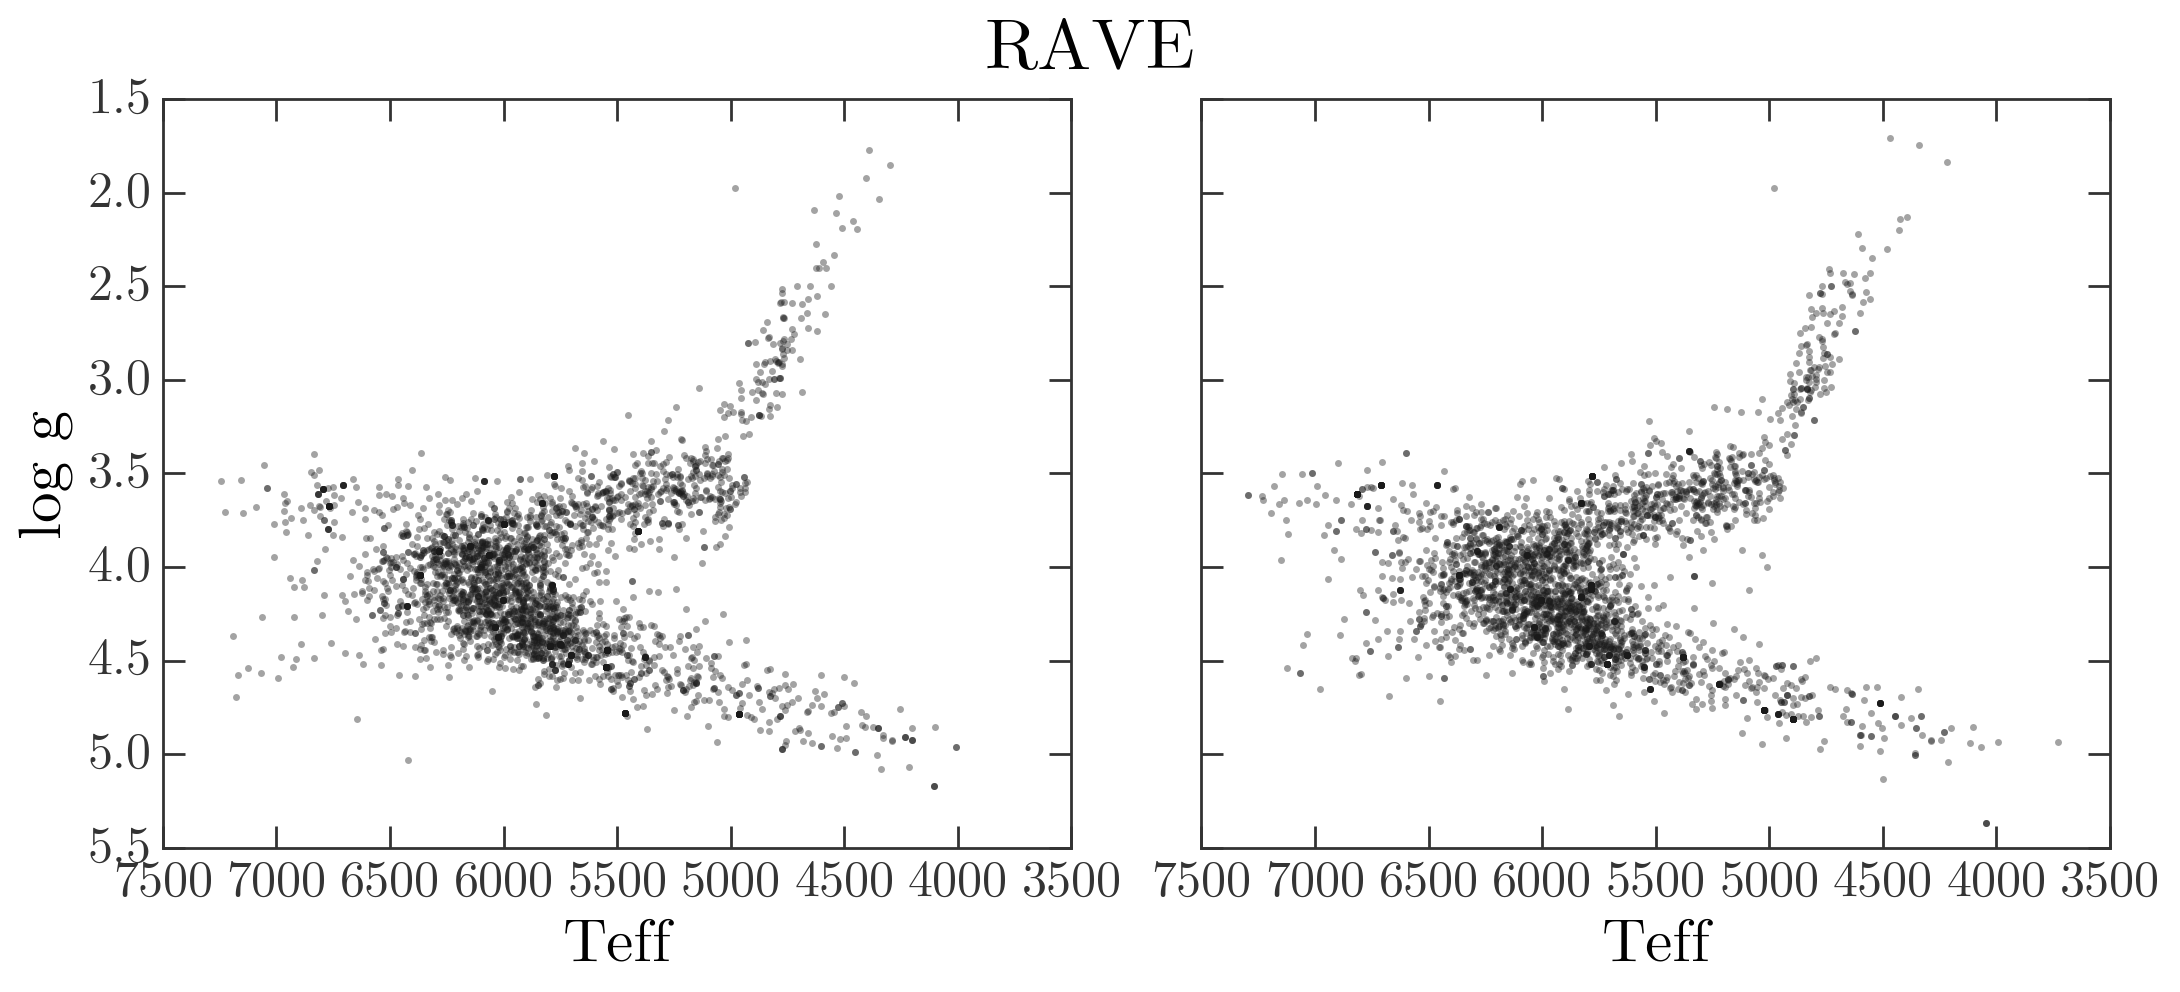

In [211]:
fig,axes = plt.subplots(1,2,figsize=(11,5),sharex=True,sharey=True)

axes[0].plot(rave1['TEFF'], rave1['LOGG'], ls='none', marker='.', alpha=0.4)
axes[1].plot(rave2['TEFF'], rave2['LOGG'], ls='none', marker='.', alpha=0.4)

# axes[1].plot(rave1['MG_H'] - rave2['MG_H'], rave1['HRV'] - rave2['HRV'],
#              ls='none', marker='.', alpha=0.4)

axes[0].set_xlim(7500, 3500)
axes[0].set_ylim(5.5, 1.5)

axes[0].set_ylabel(r'log g')
axes[0].set_xlabel(r'Teff')
axes[1].set_xlabel(r'Teff')

fig.tight_layout()

fig.suptitle("RAVE", fontsize=26)
fig.subplots_adjust(top=0.9)

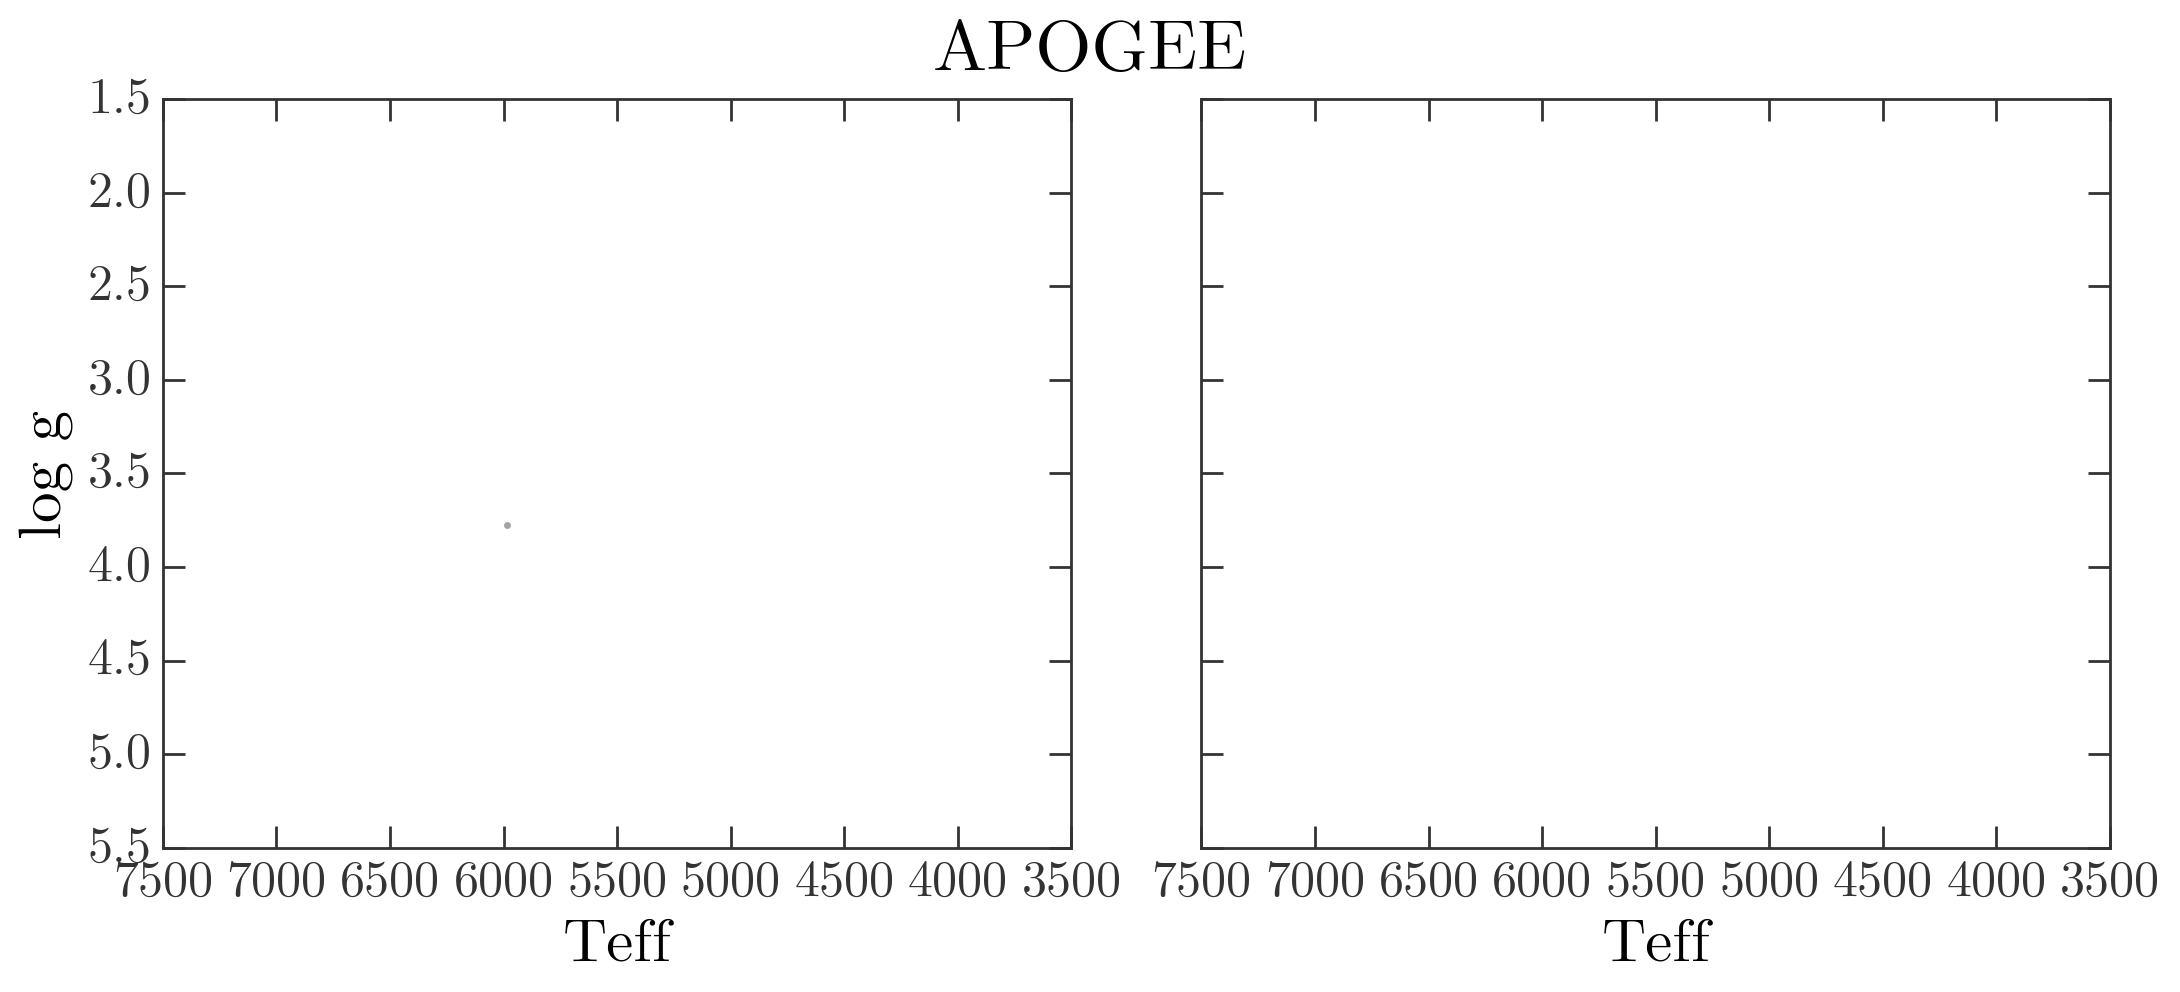

In [223]:
fig,axes = plt.subplots(1,2,figsize=(11,5),sharex=True,sharey=True)

axes[0].plot(apogee1['TEFF'], apogee1['LOGG'], ls='none', marker='.', alpha=0.4)
axes[1].plot(apogee2['TEFF'], apogee2['LOGG'], ls='none', marker='.', alpha=0.4)

# axes[1].plot(rave1['MG_H'] - rave2['MG_H'], rave1['HRV'] - rave2['HRV'],
#              ls='none', marker='.', alpha=0.4)

axes[0].set_xlim(7500, 3500)
axes[0].set_ylim(5.5, 1.5)

axes[0].set_ylabel(r'log g')
axes[0].set_xlabel(r'Teff')
axes[1].set_xlabel(r'Teff')

fig.tight_layout()

fig.suptitle("APOGEE", fontsize=26)
fig.subplots_adjust(top=0.9)

In [264]:
import matplotlib as mpl

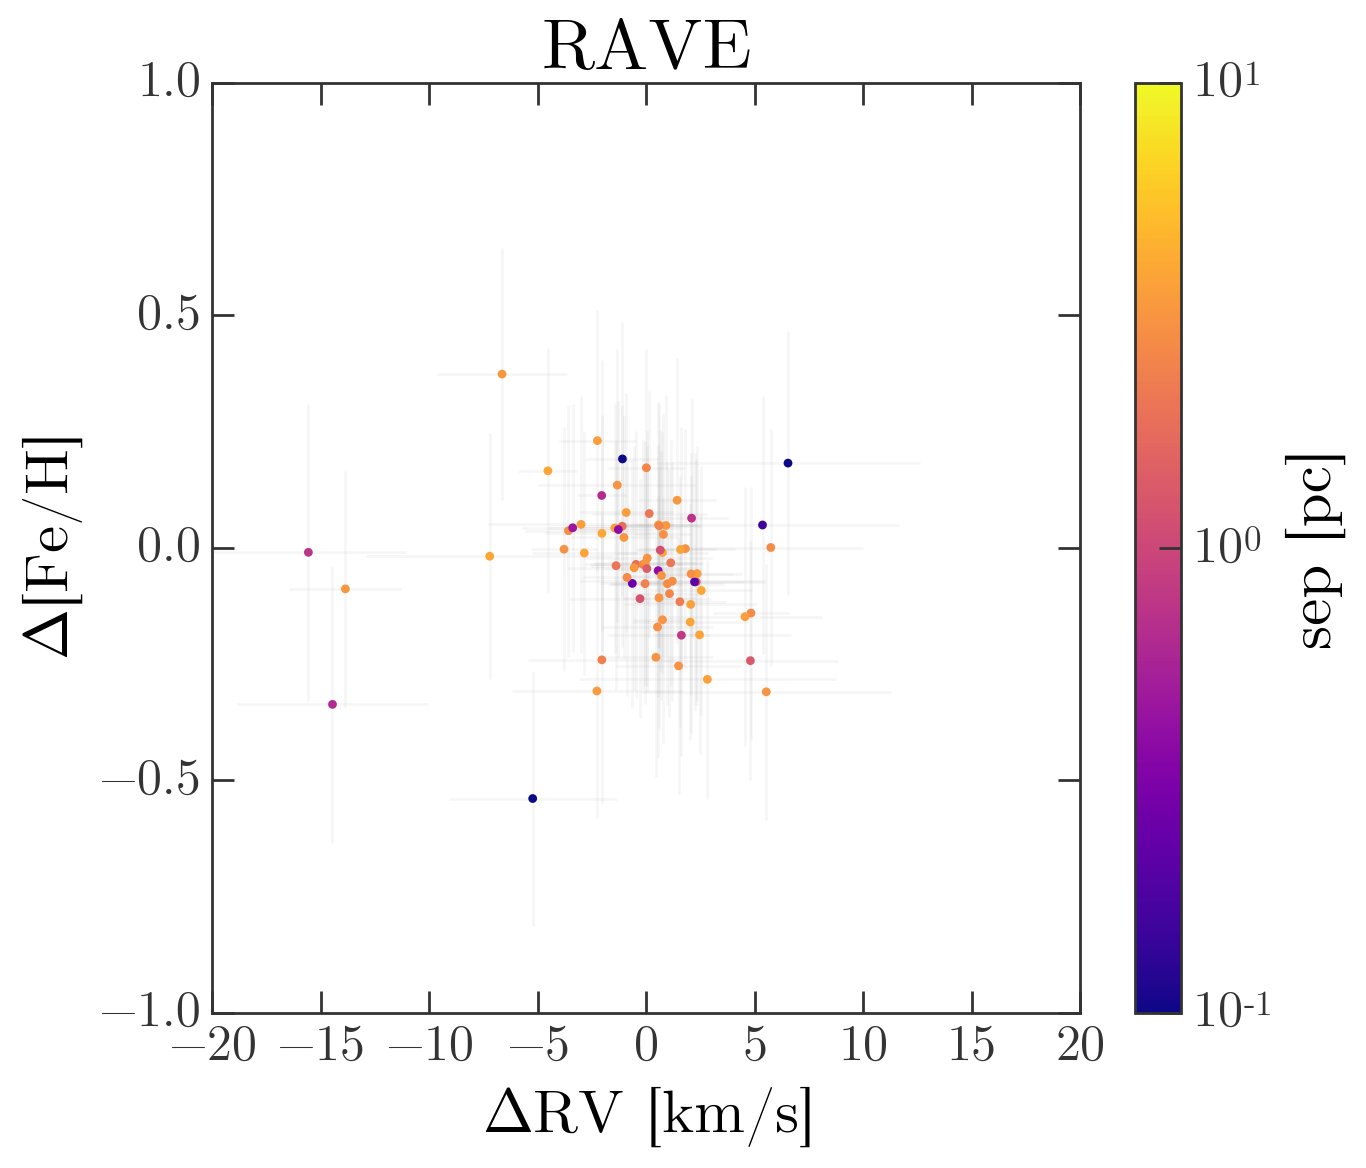

In [35]:
plt.figure(figsize=(7,6))

max_sep = 4 # pc
plt.errorbar((rave1['HRV'] - rave2['HRV'])[pair_idx_rave['sep'] < max_sep], 
             (rave1['FE_H'] - rave2['FE_H'])[pair_idx_rave['sep'] < max_sep], 
             xerr=np.sqrt(rave1['eHRV']**2 + rave2['eHRV']**2)[pair_idx_rave['sep'] < max_sep],
             yerr=np.sqrt(rave1['E_FE_H']**2 + rave2['E_FE_H'])[pair_idx_rave['sep'] < max_sep],
             marker='', ls='none', ecolor='#aaaaaa', alpha=0.1)
plt.scatter((rave1['HRV'] - rave2['HRV'])[pair_idx_rave['sep'] < max_sep], 
            (rave1['FE_H'] - rave2['FE_H'])[pair_idx_rave['sep'] < max_sep],
            c=pair_idx_rave['sep'][pair_idx_rave['sep'] < max_sep], cmap='plasma', s=10,
            vmin=0.1, vmax=10, zorder=1000, norm=mpl.colors.LogNorm())

cb = plt.colorbar()
cb.set_label("sep [pc]")

plt.xlim(-20, 20)
plt.ylim(-1, 1)

plt.ylabel(r'$\Delta$[Fe/H]')
plt.xlabel(r'$\Delta$RV [km/s]')

plt.title("RAVE")

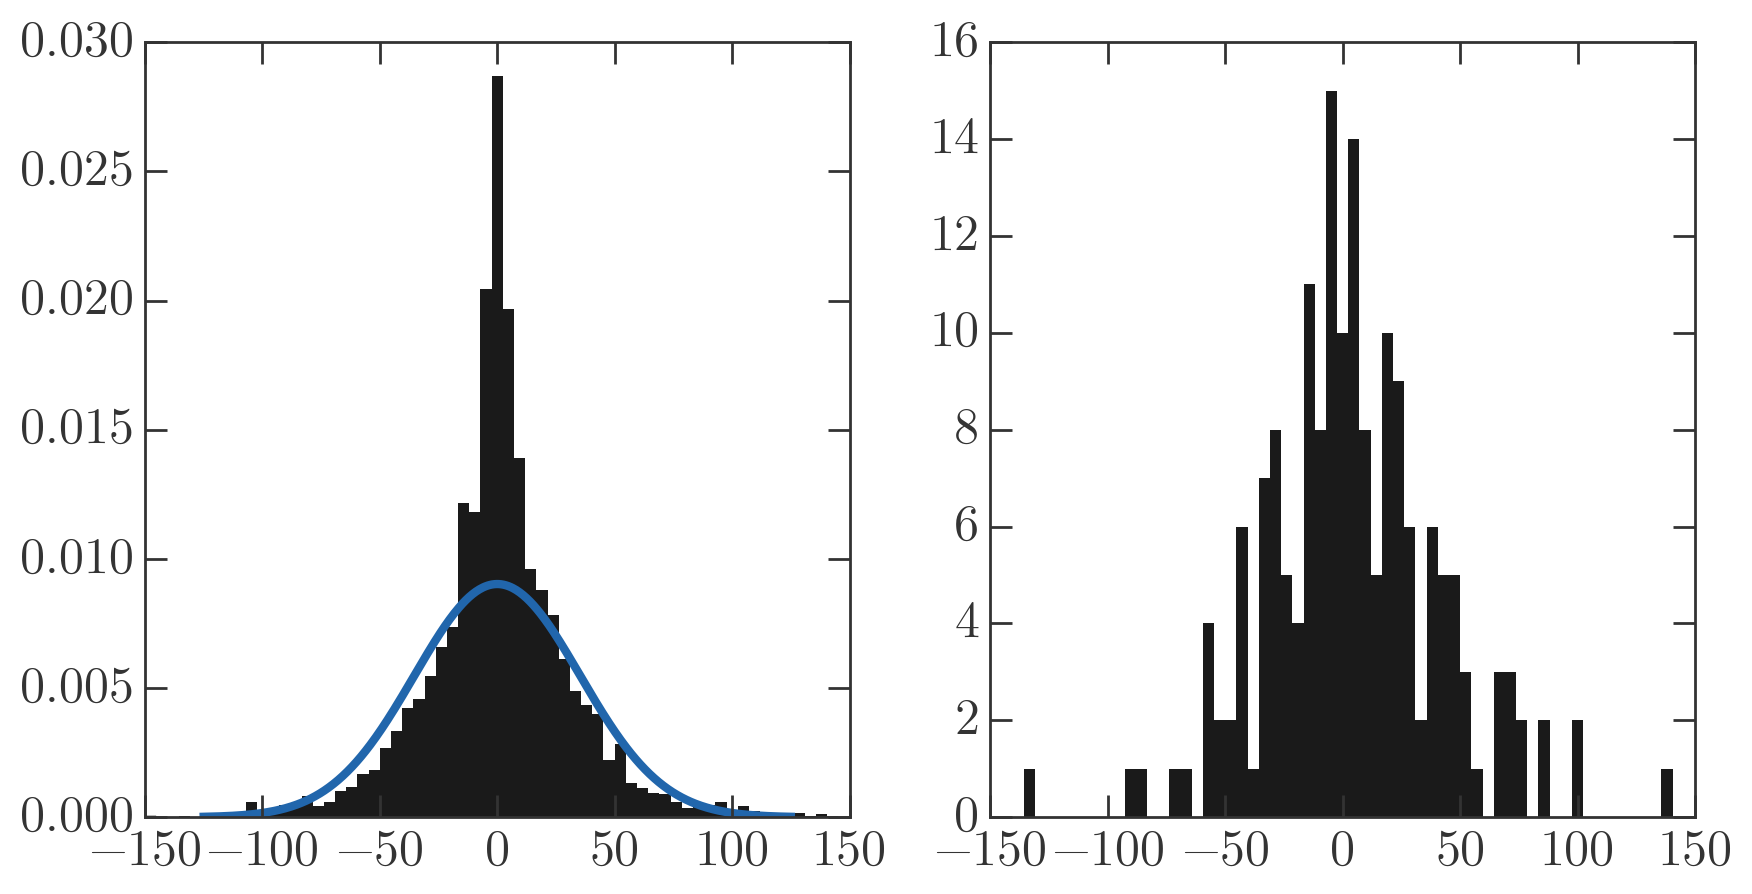

In [52]:
bins = bins=np.linspace(-150, 150, 64)

fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].hist(rave1['HRV'] - rave2['HRV'], bins=bins, normed=True);
dvgrid = np.linspace(-125, 125, 512)
axes[0].plot(dvgrid, 0.8*norm.pdf(dvgrid, 0, np.sqrt(2)*25), marker='', lw=3)

axes[1].hist(rave1['HRV'][pair_idx_rave['mutexc']] - rave2['HRV'][pair_idx_rave['mutexc']], bins=bins);

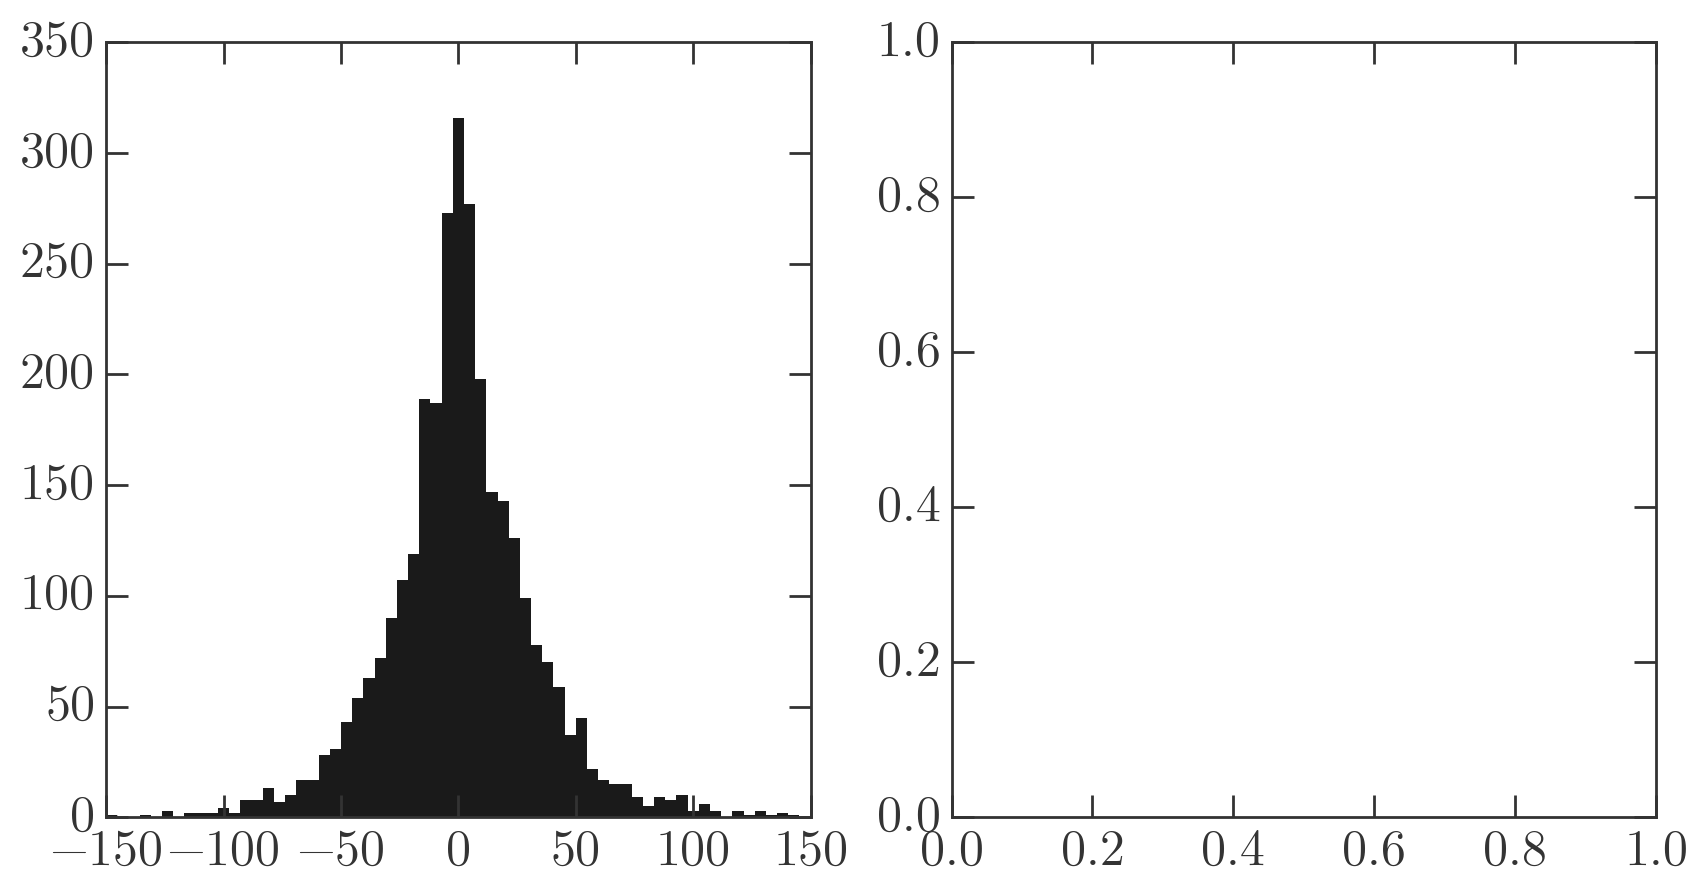

In [41]:
bins = bins=np.linspace(-150, 150, 64)

fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].hist(rave1['HRV'][pair_idx_rave['sep'] > 8] - rave2['HRV'][pair_idx_rave['sep'] > 8], bins=bins);
# axes[1].hist(rave1['HRV'][pair_idx_rave['mutexc']] - rave2['HRV'][pair_idx_rave['mutexc']], bins=bins);

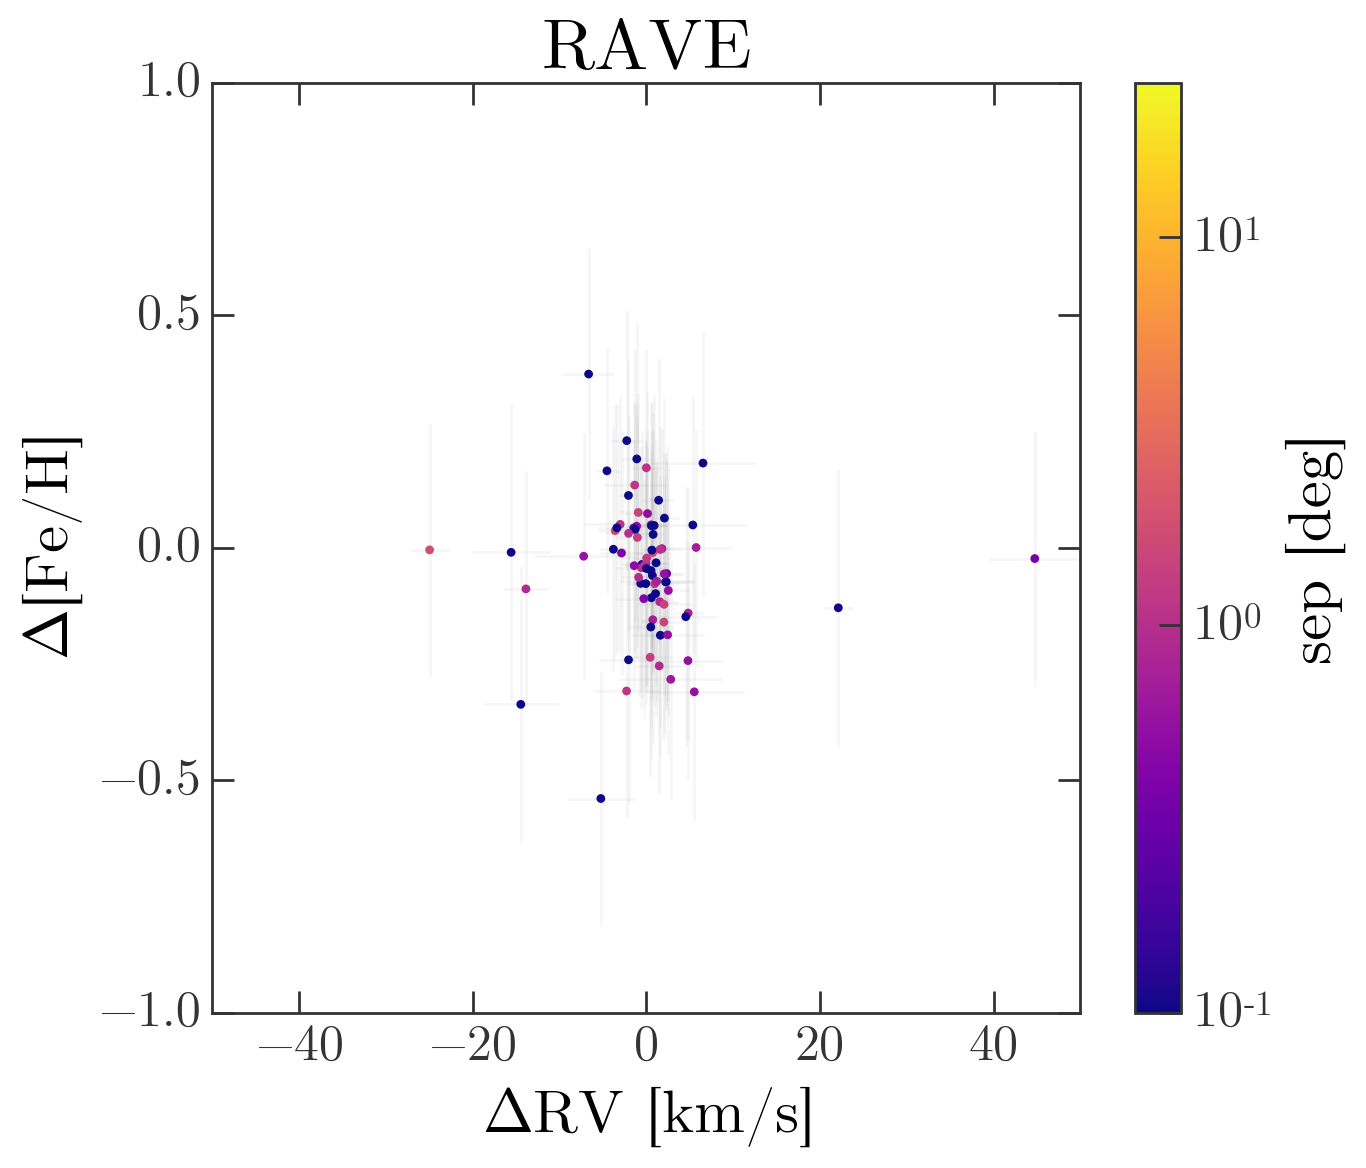

In [31]:
plt.figure(figsize=(7,6))

max_sep = 4 # pc
plt.errorbar((rave1['HRV'] - rave2['HRV'])[pair_idx_rave['sep'] < max_sep], 
             (rave1['FE_H'] - rave2['FE_H'])[pair_idx_rave['sep'] < max_sep], 
             xerr=np.sqrt(rave1['eHRV']**2 + rave2['eHRV']**2)[pair_idx_rave['sep'] < max_sep],
             yerr=np.sqrt(rave1['E_FE_H']**2 + rave2['E_FE_H'])[pair_idx_rave['sep'] < max_sep],
             marker='', ls='none', ecolor='#aaaaaa', alpha=0.1)
plt.scatter((rave1['HRV'] - rave2['HRV'])[pair_idx_rave['sep'] < max_sep], 
            (rave1['FE_H'] - rave2['FE_H'])[pair_idx_rave['sep'] < max_sep],
            c=rave_sky_sep[pair_idx_rave['sep'] < max_sep].to(u.degree).value, cmap='plasma', s=10,
            vmin=0.1, vmax=25, zorder=1000, norm=mpl.colors.LogNorm())

cb = plt.colorbar()
cb.set_label("sep [deg]")

plt.xlim(-50, 50)
plt.ylim(-1, 1)

plt.ylabel(r'$\Delta$[Fe/H]')
plt.xlabel(r'$\Delta$RV [km/s]')

plt.title("RAVE")

In [230]:
giant_cut = (rave1['LOGG'] < 3.25) & (rave2['LOGG'] < 3.25)
giantgiant1 = rave1[giant_cut]
giantgiant2 = rave2[giant_cut]

giant_sky_seps = c1[giant_cut].separation(c2[giant_cut])

gg_sep = pair_idx_rave['sep'][giant_cut]
gg_dv = pair_idx_rave['delta_v'][giant_cut]

In [250]:
len(giantgiant1)

17

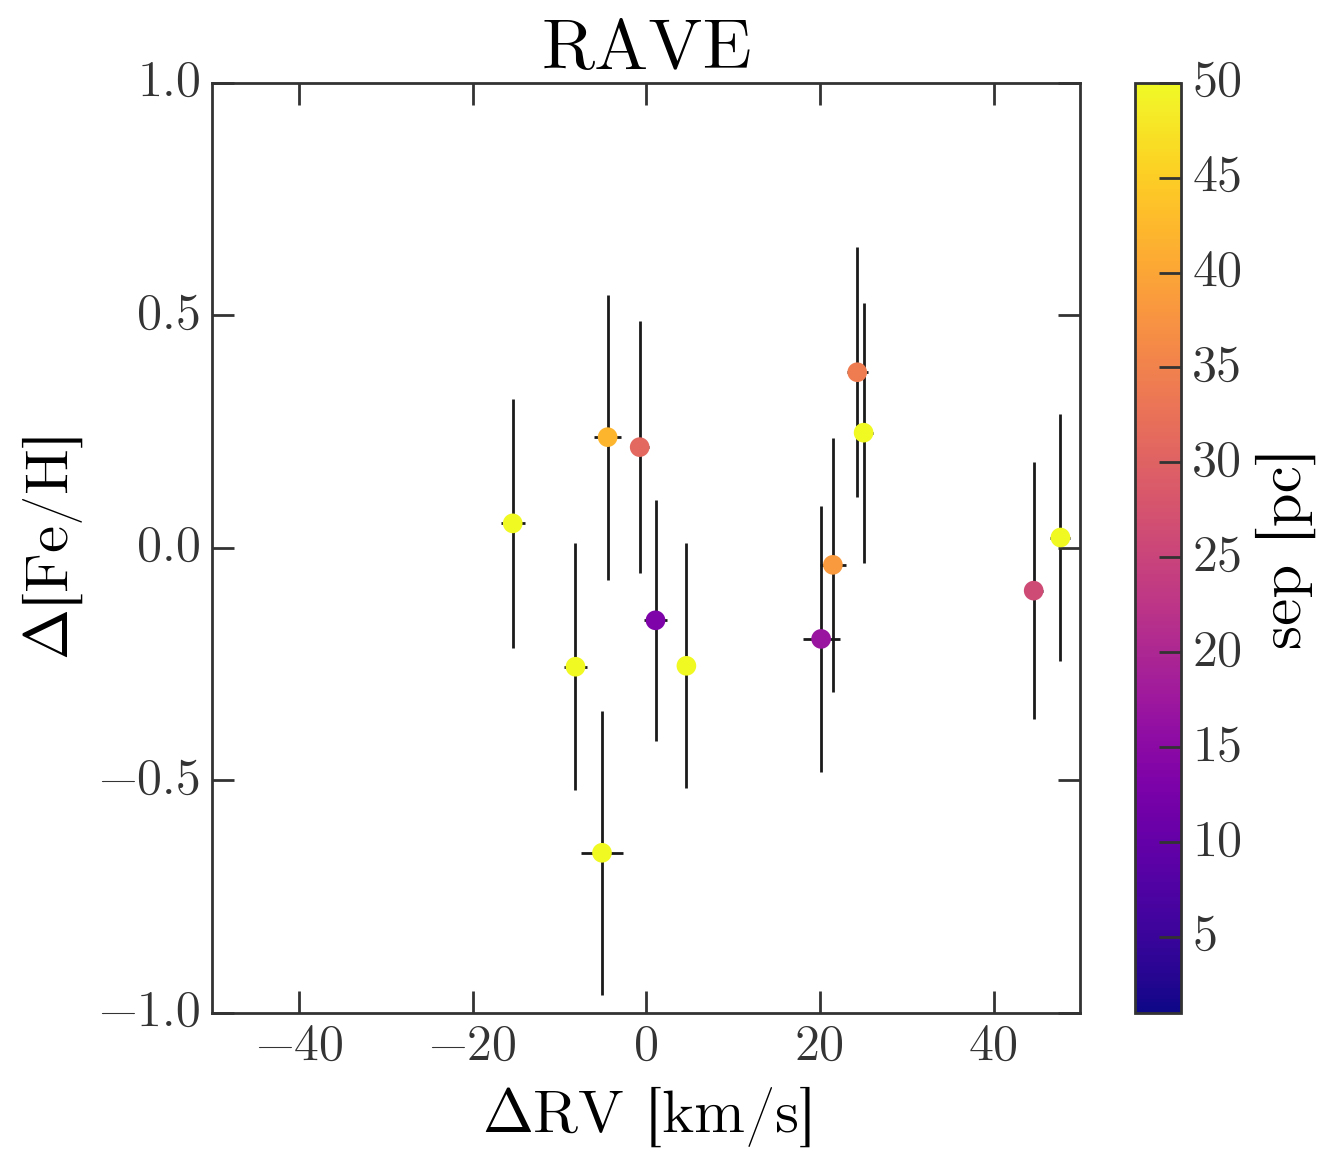

In [236]:
plt.figure(figsize=(7,6))

plt.errorbar(giantgiant1['HRV'] - giantgiant2['HRV'], 
             giantgiant1['FE_H'] - giantgiant2['FE_H'],
             xerr=np.sqrt(giantgiant1['eHRV']**2 + giantgiant2['eHRV']**2),
             yerr=np.sqrt(giantgiant1['E_FE_H']**2 + giantgiant2['E_FE_H']),
             marker='', ls='none')
plt.scatter(giantgiant1['HRV'] - giantgiant2['HRV'], 
            giantgiant1['FE_H'] - giantgiant2['FE_H'],
            c=gg_sep, cmap='plasma', vmin=1, vmax=50,
            zorder=100, s=50)

cb = plt.colorbar()
cb.set_label("sep [pc]")

plt.xlim(-50, 50)
plt.ylim(-1, 1)

plt.ylabel(r'$\Delta$[Fe/H]')
plt.xlabel(r'$\Delta$RV [km/s]')

plt.title("RAVE")

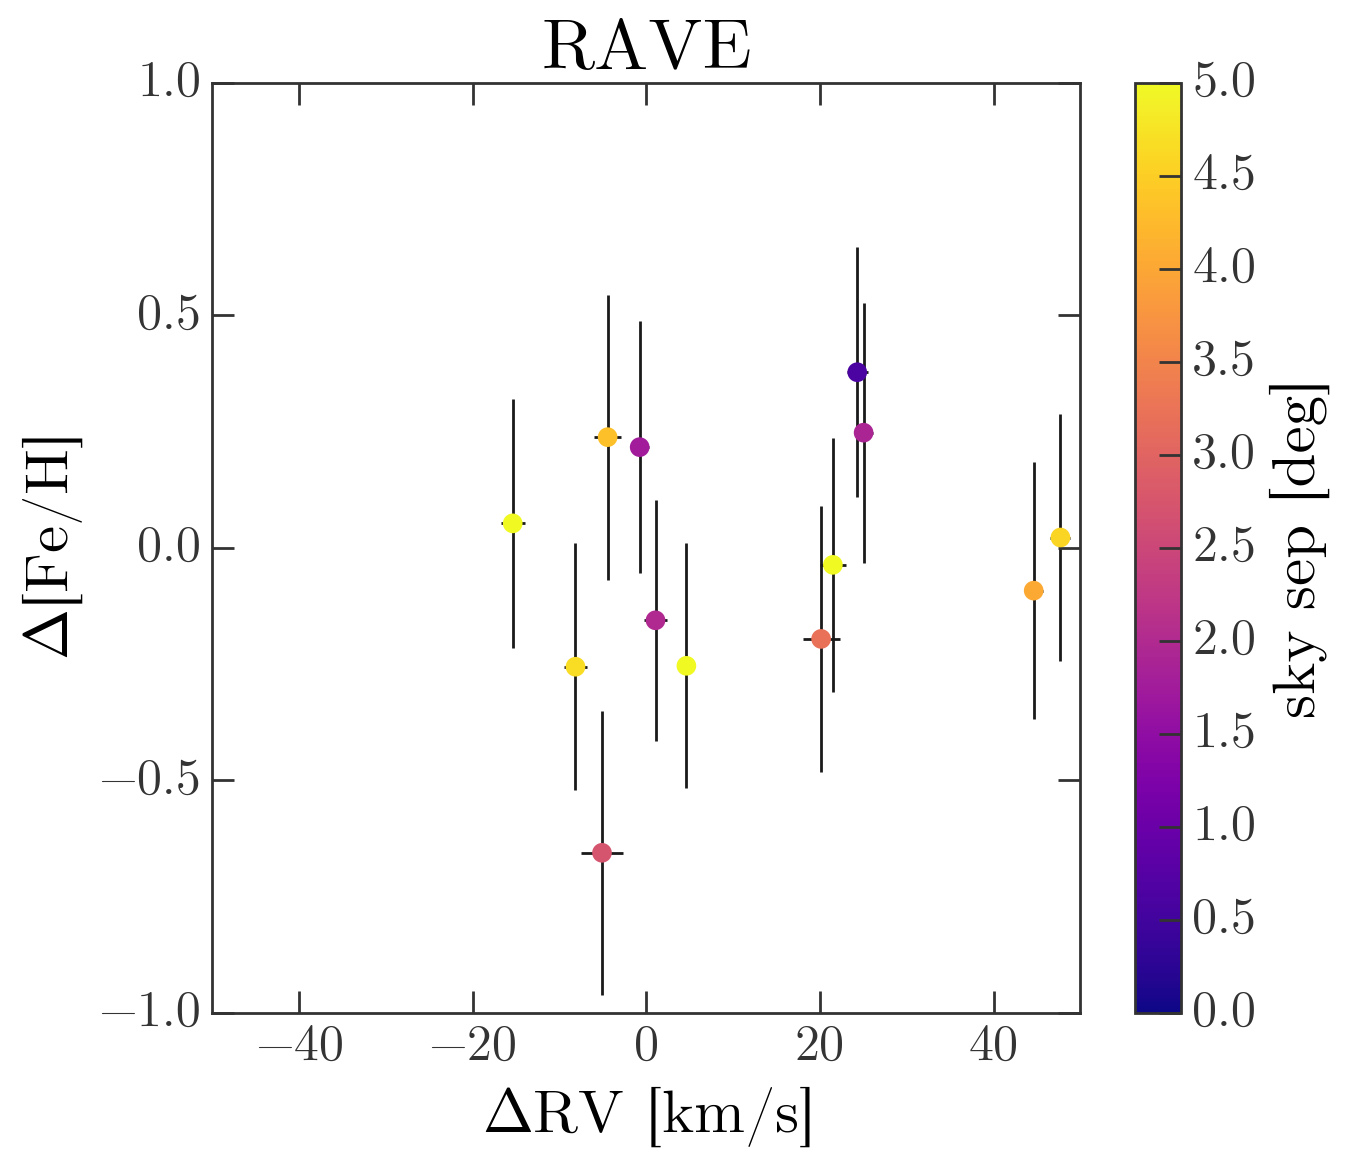

In [239]:
plt.figure(figsize=(7,6))

plt.errorbar(giantgiant1['HRV'] - giantgiant2['HRV'], 
             giantgiant1['FE_H'] - giantgiant2['FE_H'],
             xerr=np.sqrt(giantgiant1['eHRV']**2 + giantgiant2['eHRV']**2),
             yerr=np.sqrt(giantgiant1['E_FE_H']**2 + giantgiant2['E_FE_H']),
             marker='', ls='none')
plt.scatter(giantgiant1['HRV'] - giantgiant2['HRV'], 
            giantgiant1['FE_H'] - giantgiant2['FE_H'],
            c=giant_sky_seps.to(u.degree).value, cmap='plasma', vmin=0, vmax=5,
            zorder=100, s=50)

cb = plt.colorbar()
cb.set_label("sky sep [deg]")

plt.xlim(-50, 50)
plt.ylim(-1, 1)

plt.ylabel(r'$\Delta$[Fe/H]')
plt.xlabel(r'$\Delta$RV [km/s]')

plt.title("RAVE")

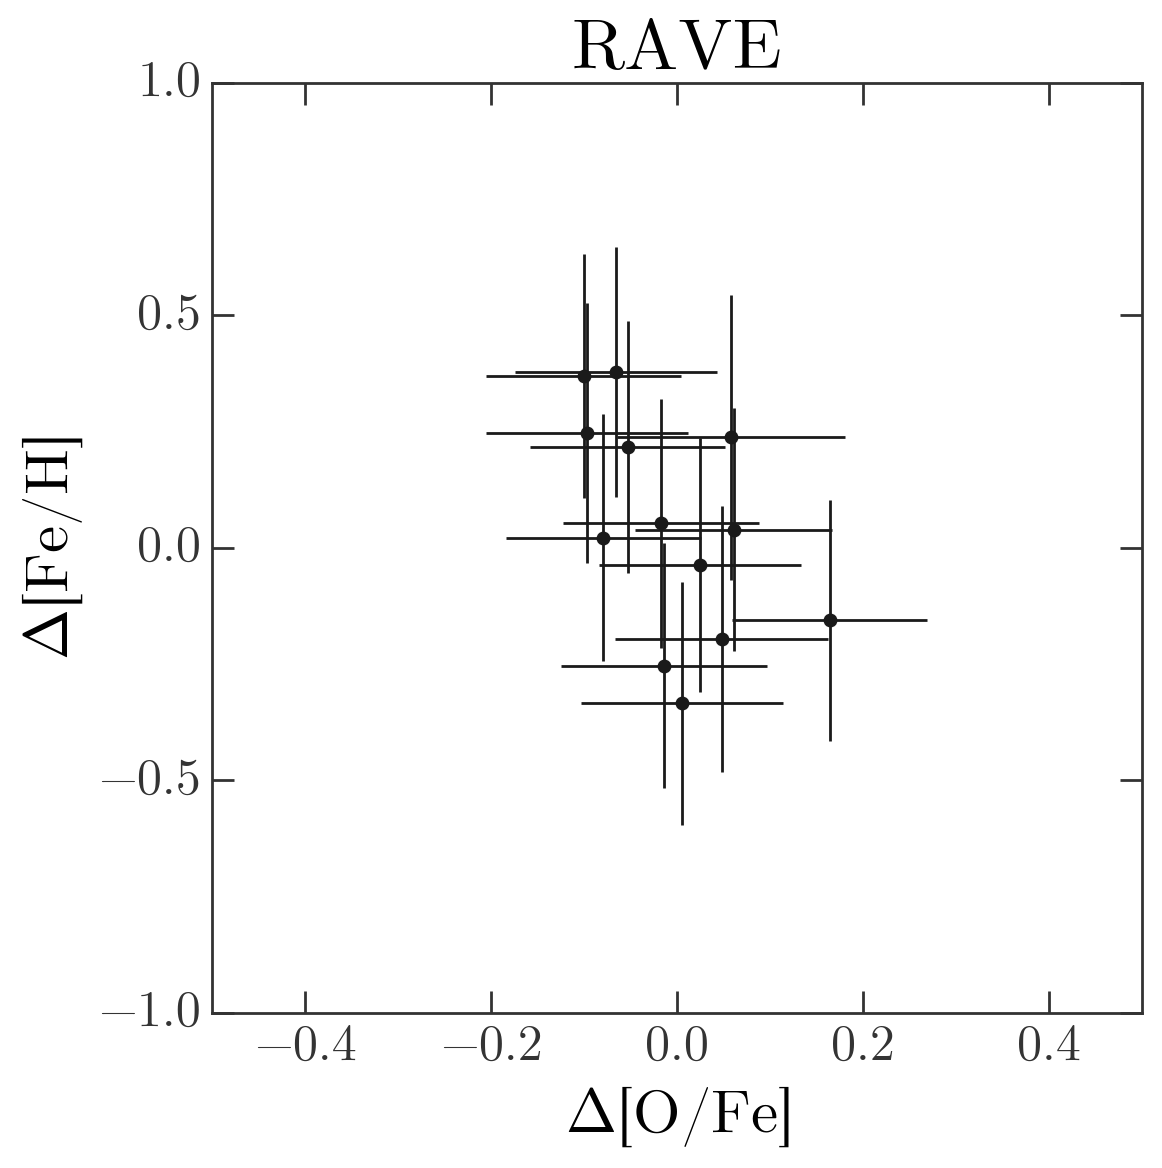

In [213]:
plt.figure(figsize=(6,6))

plt.errorbar( (giantgiant1['O_H']-giantgiant1['FE_H']) - (giantgiant2['O_H']-giantgiant2['FE_H']), 
             giantgiant1['FE_H'] - giantgiant2['FE_H'],
             xerr=np.sqrt(giantgiant1['E_O_H']**2 + giantgiant2['E_O_H']**2),
             yerr=np.sqrt(giantgiant1['E_FE_H']**2 + giantgiant2['E_FE_H']),
             marker='o', ls='none')

plt.xlim(-0.5, 0.5)
plt.ylim(-1, 1)

plt.xlabel(r'$\Delta$[O/Fe]')
plt.ylabel(r'$\Delta$[Fe/H]')

plt.title("RAVE")

In [40]:
rand_idx1 = np.random.choice(len(tgas_rave), size=256, replace=False)
rand_idx2 = np.random.choice(len(tgas_rave), size=256, replace=False)
rand1 = rave_giants[rand_idx1]
rand2 = rave_giants[rand_idx2]

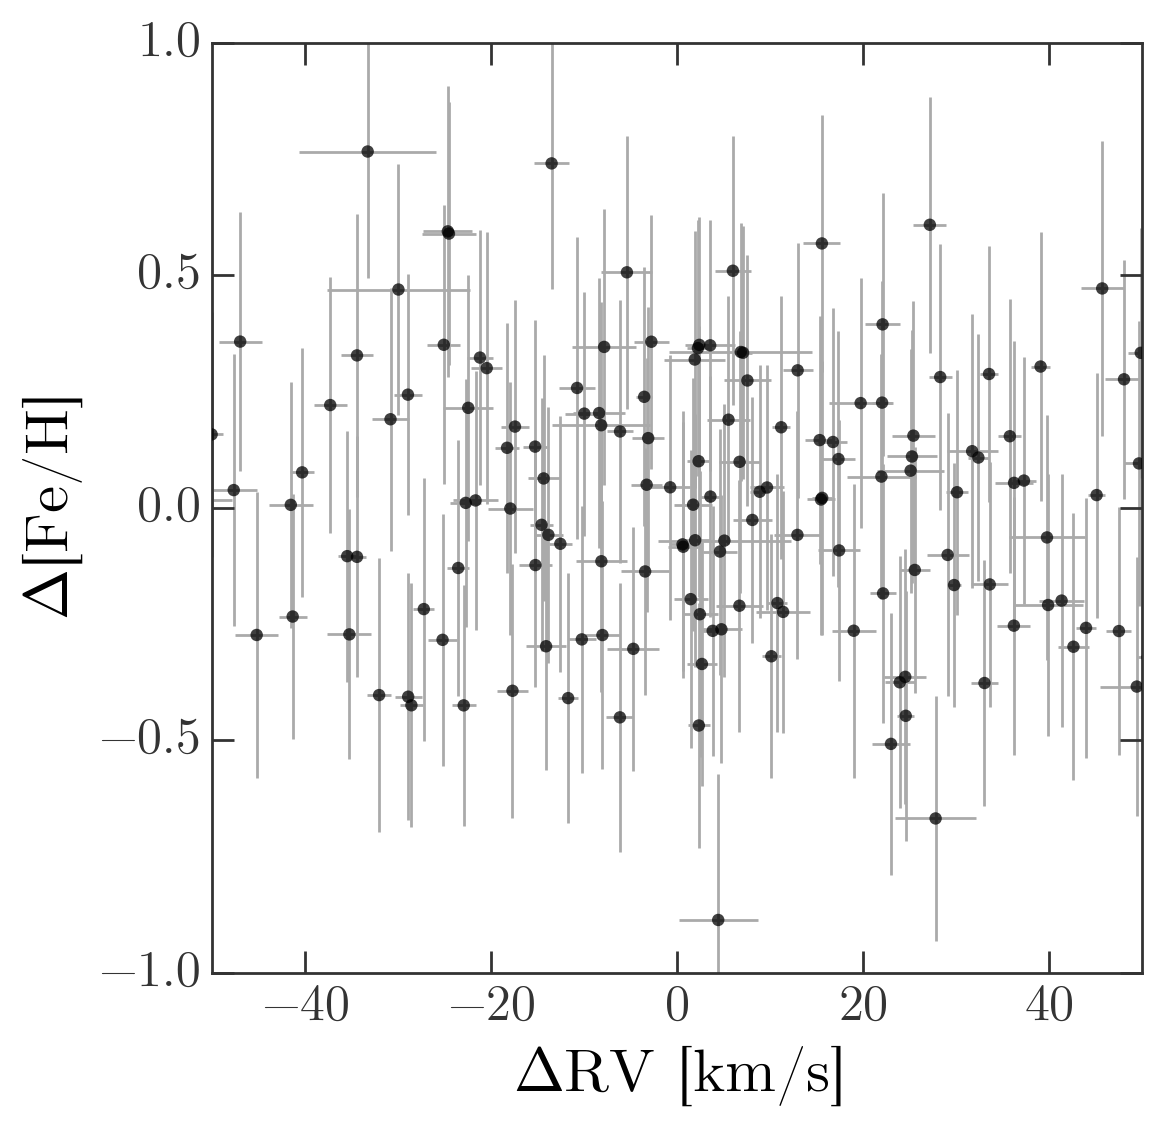

In [38]:
plt.figure(figsize=(6,6))

plt.errorbar(rand1['HRV'] - rand2['HRV'], 
             rand1['FE_H'] - rand2['FE_H'],
             xerr=np.sqrt(rand1['eHRV']**2 + rand2['eHRV']**2),
             yerr=np.sqrt(rand1['E_FE_H']**2 + rand2['E_FE_H']),
             marker='', ls='none', ecolor='#aaaaaa')
plt.scatter(rand1['HRV'] - rand2['HRV'], 
            rand1['FE_H'] - rand2['FE_H'],
            c='k', zorder=100, s=20, alpha=0.75)

plt.xlim(-50, 50)
plt.ylim(-1, 1)

plt.ylabel(r'$\Delta$[Fe/H]')

plt.xlabel(r'$\Delta$RV [km/s]')

In [ ]:
plt.figure(figsize=(6,6))

plt.errorbar((rand1['HRV'] - rand2['HRV']), 
             rand1['FE_H'] - rand2['FE_H'],
             xerr=np.sqrt(rand1['eHRV']**2 + rand2['eHRV']**2),
             yerr=np.sqrt(rand1['E_FE_H']**2 + rand2['E_FE_H']),
             marker='', ls='none', ecolor='#aaaaaa')
plt.scatter(rand1['HRV'] - rand2['HRV'], 
            rand1['FE_H'] - rand2['FE_H'],
            c='k', zorder=100, s=20, alpha=0.75)

plt.xlim(-50, 50)
plt.ylim(-1, 1)

plt.ylabel(r'$\Delta$[Fe/H]')

plt.xlabel(r'$\Delta$RV [km/s]')

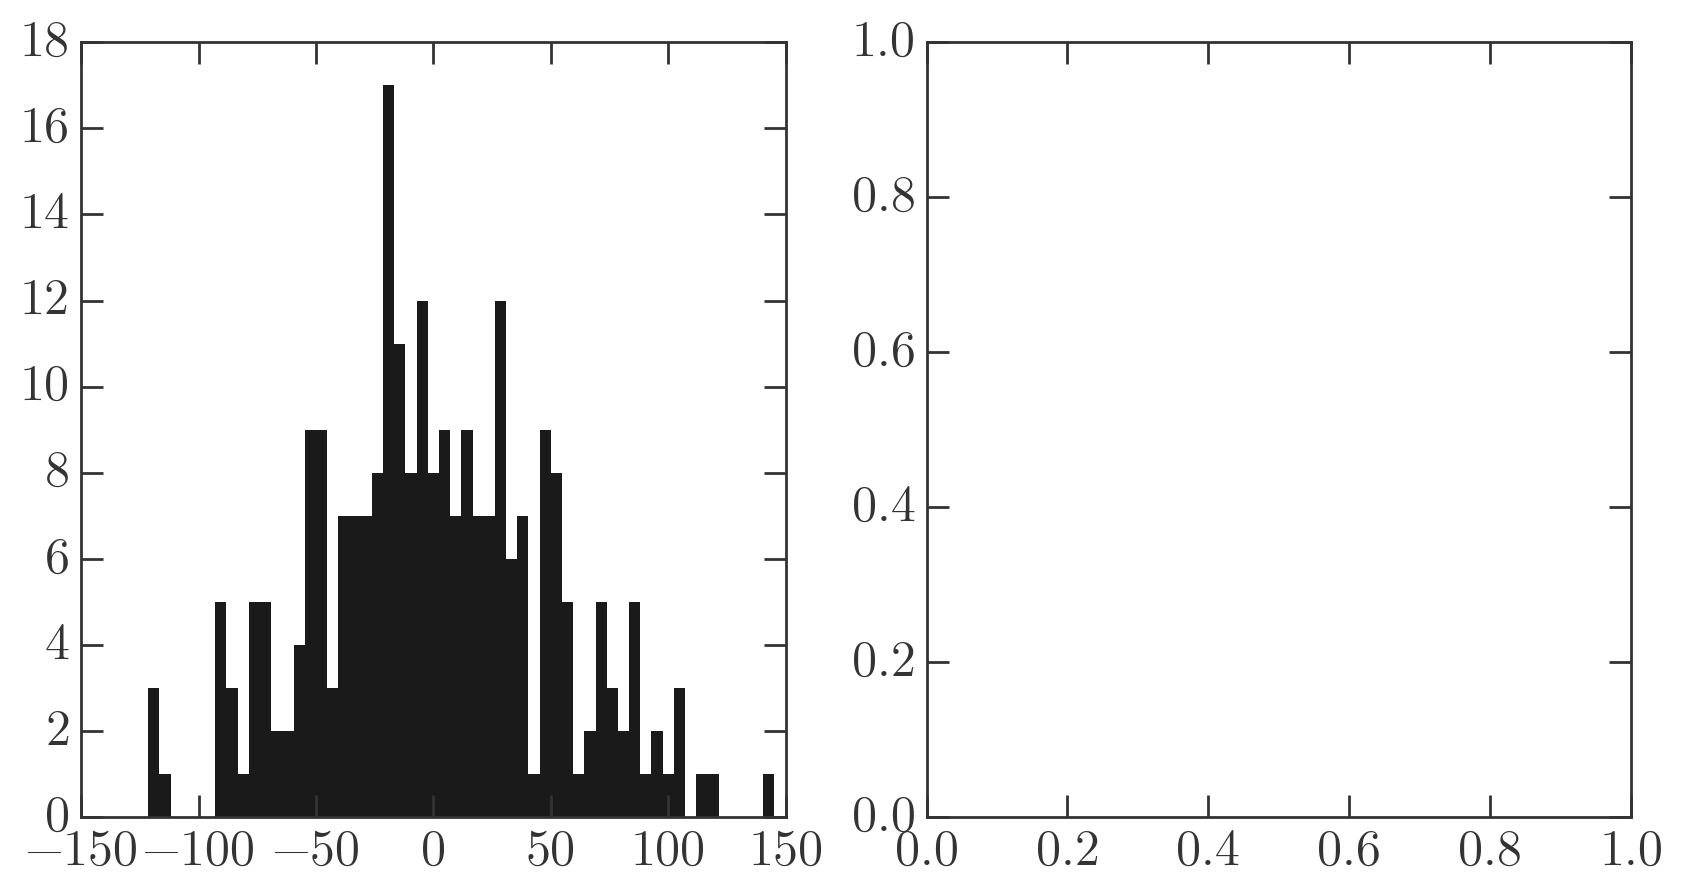

In [29]:
bins = bins=np.linspace(-150, 150, 64)

fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].hist(rand1['HRV'] - rand2['HRV'], bins=bins);
# axes[1].hist(rave1['HRV'][pair_idx_rave['mutexc']] - rave2['HRV'][pair_idx_rave['mutexc']], bins=bins);

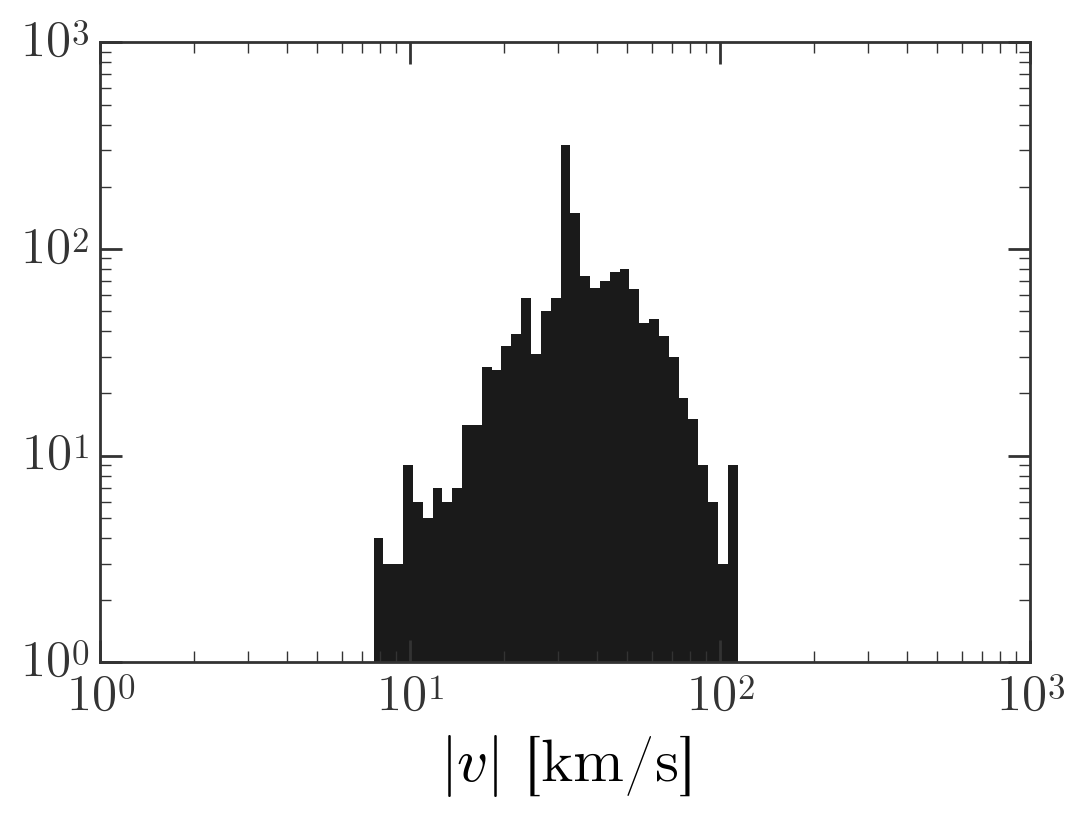

In [294]:
_derp = (rave1['parallax'] / rave1['parallax_error']) > 16
vtan = 4.74*np.sqrt(rave1['pmra']**2 + rave1['pmdec']**2) / rave1['parallax']
vr = rave1['HRV']

plt.hist(np.sqrt(vtan[_derp]**2 + vr[_derp]**2), bins=np.logspace(0.5, 2.5, 64))
plt.xscale('log')
plt.yscale('log')

plt.xlabel('$|v|$ [km/s]')

## APOGEE

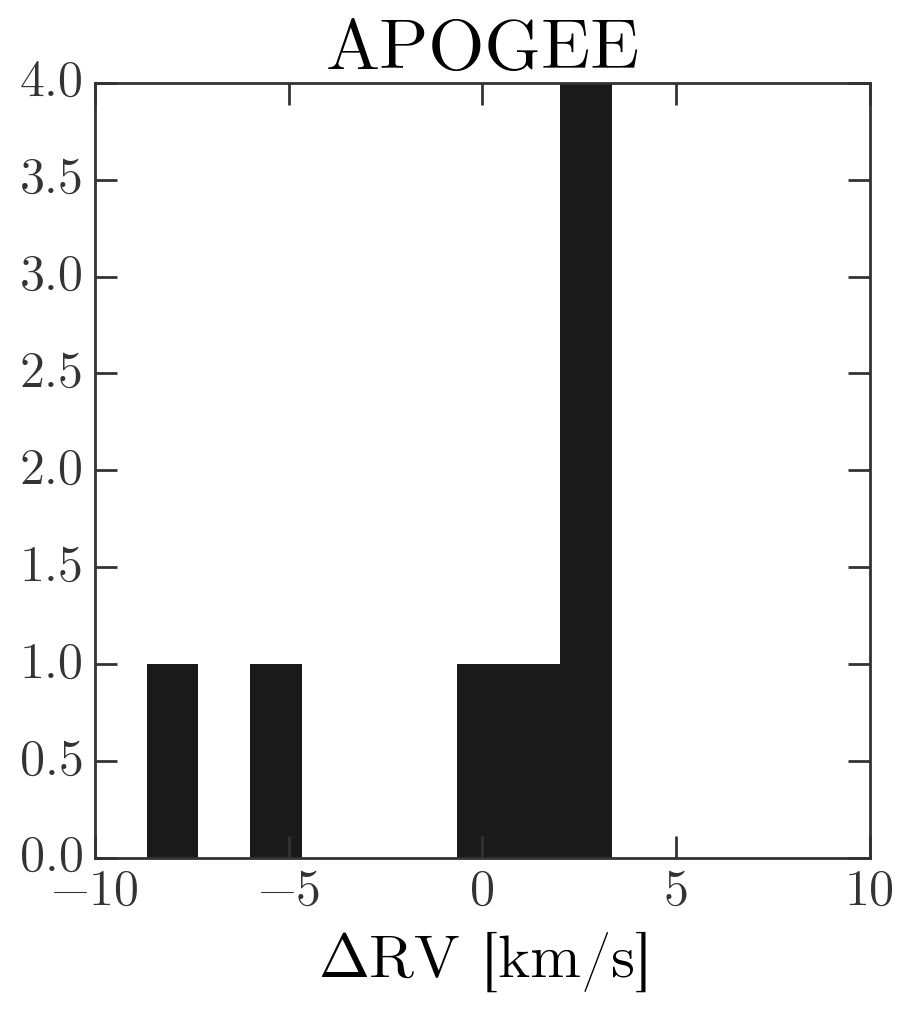

In [224]:
plt.figure(figsize=(5,5))

plt.hist(apogee1['VHELIO_AVG'] - apogee2['VHELIO_AVG'], 
         bins=np.linspace(-10,10,16))
plt.xlabel(r'$\Delta$RV [km/s]')

plt.title("APOGEE")

In [242]:
apogee_star1 = apogee1[np.abs(apogee1['VHELIO_AVG'] - apogee2['VHELIO_AVG']) < 10]
apogee_star2 = apogee2[np.abs(apogee1['VHELIO_AVG'] - apogee2['VHELIO_AVG']) < 10]

In [248]:
print(np.vstack((apogee_star1['APOGEE_ID'], apogee_star2['APOGEE_ID'])).T)

[['2M03472289+2255196' '2M03495648+2313071']
 ['2M03495648+2313071' '2M03465373+2335009']
 ['2M03495648+2313071' '2M03403072+2429143']
 ['2M03465373+2335009' '2M03403072+2429143']
 ['2M03465373+2335009' '2M03455913+2523549']
 ['2M03515685+2354070' '2M03455913+2523549']
 ['2M03515685+2354070' '2M03474683+2523085']
 ['2M03455913+2523549' '2M03474683+2523085']]


---